In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
#fetch the mnist dataset
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(x.shape,y.shape)

(70000, 784) (70000,)


In [3]:
#x_n = x.to_numpy()
x_n = x
#y_n = y.to_numpy()
y_n = y

In [4]:
y_n = y_n.astype('int') #convert output to integers 0-9
x_norm = x_n/255.0 #normalise input data
x_train, x_val, y_train, y_val = train_test_split(x_norm, y_n, test_size=0.1, random_state=42) #split the data into train and validation
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

x_train = x_train.T #take the transpose of the training data m*784 -> 784*m
x_val = x_val.T #take the transpose of the test data m*784 -> 784*m
print(x_train.shape, x_val.shape)

(63000, 784) (7000, 784) (63000,) (7000,)
(784, 63000) (784, 7000)


In [5]:
def Gaussian_init(mu, sigma):
  np.random.seed(2)

  gauss_w1 = np.random.normal(mu, sigma, (400, 784))
  gauss_b1 = np.random.normal(mu, sigma, (400, 1))
  gauss_w2 = np.random.normal(mu, sigma, (250, 400))
  gauss_b2 = np.random.normal(mu, sigma, (250, 1))
  gauss_w3 = np.random.normal(mu, sigma, (200, 250))
  gauss_b3 = np.random.normal(mu, sigma, (200, 1))
  gauss_w4 = np.random.normal(mu, sigma, (50, 200))
  gauss_b4 = np.random.normal(mu, sigma, (50, 1))
  gauss_w5 = np.random.normal(mu, sigma, (10, 50))
  gauss_b5 = np.random.normal(mu, sigma, (10, 1)) 

  gauss_w1[gauss_w1 < 0.1] = 0.1
  gauss_b1[gauss_b1 < 0.1] = 0.1
  gauss_w2[gauss_w2 < 0.1] = 0.1
  gauss_b2[gauss_b2 < 0.1] = 0.1  
  gauss_w3[gauss_w3 < 0.1] = 0.1
  gauss_b3[gauss_b3 < 0.1] = 0.1 
  gauss_w4[gauss_w4 < 0.1] = 0.1
  gauss_b4[gauss_b4 < 0.1] = 0.1 
  gauss_w5[gauss_w5 < 0.1] = 0.1
  gauss_b5[gauss_b5 < 0.1] = 0.1 


  return (gauss_w1, gauss_b1, gauss_w2, gauss_b2, gauss_w3, gauss_b3, gauss_w4, gauss_b4, gauss_w5, gauss_b5)
  
#have to change with different number of layers
def params_init():

  np.random.seed(2)
  W1 = np.random.rand(400,784) - 0.5
  b1 = np.random.rand(400,1) - 0.5
  W2 = np.random.rand(250,400) - 0.5
  b2 = np.random.rand(250,1) - 0.5
  W3 = np.random.rand(200,250) - 0.5 
  b3 = np.random.rand(200,1) - 0.5
  W4 = np.random.rand(50,200) - 0.5   
  b4 = np.random.rand(50,1) - 0.5    
  W5 = np.random.rand(10,50) - 0.5  
  b5 = np.random.rand(10,1) - 0.5    
  print("Params Initialised")

  return (W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)


#have to change with different number of layers
def forward(x_train, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5):
  #print("Entered FP")
  Z1 = np.matmul(W1,x_train) + b1 #W1 is 50*784, x_train is 748*m, Z1 is 50*m
  A1 = relu(Z1)

  Z2 = np.matmul(W2,A1) + b2 
  A2 = relu(Z2)

  Z3 = np.matmul(W3,A2) + b3
  A3 = relu(Z3)
  
  Z4 = np.matmul(W4,A3) + b4
  A4 = relu(Z4)

  Z5 = np.matmul(W5,A4) + b5
  A5 = softmax(Z5)

  #W2 is 10*50, A1 is 50*m
  # print(np.exp(Z2))
  # print(np.sum(np.exp(Z2)))

  #A2 is 10*m, final predictions
  # print("Fp Done")

  return Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5


def relu(x):
   return np.maximum(x,0)


def softmax(Z):
  return np.exp(Z) / np.sum(np.exp(Z),0)


def relu_d(x):
  return x>0


def one_hot_encoding(y):
  shape = (y.shape[0], 10)
  one_hot = np.zeros(shape)
  rows = np.arange(y.size)
  one_hot[rows, y] = 1
  return one_hot.T


#have to change with different number of layers
def backprop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5, W1, W2, W3, W4, W5, X, y):
  # print("Entered Backprop")
  m = y.shape[0] #m is the number of training examples
  Y = one_hot_encoding(y)

  dZ5 = (A5 - Y)
  
  dW5 = 1/m*np.matmul(dZ5,A4.T)

  db5 = 1/m*np.sum(dZ5)

  dZ4 = np.matmul(W5.T, dZ5)*relu_d(Z4)  #shape of A2, Y, dZ2 = 10*m

  dW4 = 1/m*np.matmul(dZ4,A3.T) #shape of dZ2 is 10*m, A1 is 50*m, dW2 = 10*50

  db4 = 1/m*np.sum(dZ4) #db1 is 50,1

  dZ3 = np.matmul(W4.T, dZ4)*relu_d(Z3)  #shape of A2, Y, dZ2 = 10*m

  dW3 = 1/m*np.matmul(dZ3,A2.T) #shape of dZ2 is 10*m, A1 is 50*m, dW2 = 10*50

  db3 = 1/m*np.sum(dZ3) #db1 is 50,1

  dZ2 = np.matmul(W3.T, dZ3)*relu_d(Z2) #W2 is 10*50, dZ2 = 10*m, dZ1 = 50*m

  dW2 = 1/m*np.matmul(dZ2,A1.T) #shape of dZ1 is 50*m, X is 784*m, dW1 = 50*784

  db2 = 1/m*np.sum(dZ2) #db1 is 50*1

  dZ1 = np.matmul(W2.T, dZ2)*relu_d(Z1) #W2 is 10*50, dZ2 = 10*m, dZ1 = 50*m

  dW1 = 1/m*np.matmul(dZ1,X.T) #shape of dZ1 is 50*m, X is 784*m, dW1 = 50*784

  db1 = 1/m*np.sum(dZ1) #db1 is 50*1


  return dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5


#have to change with different number of layers
def param_update(W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5, lr, factor):

  #updates the parameters based on backpropogation and decay rate
  #decay = np.exp(factor)

  #W1 = W1*np.exp(-5*factor) - lr*dW1
  #b1 = b1*np.exp(-5*factor) - lr*db1
  #W2 = W2*np.exp(-4*factor) - lr*dW2
  #b2 = b2*np.exp(-4*factor) - lr*db2
  #W3 = W3*np.exp(-3*factor) - lr*dW3
  #b3 = b3*np.exp(-3*factor) - lr*db3
  #W4 = W4*np.exp(-2*factor) - lr*dW4
  #b4 = b4*np.exp(-2*factor) - lr*db4
  #W5 = W5*np.exp(-1*factor) - lr*dW5
  #b5 = b5*np.exp(-1*factor) - lr*db5

  W1 = W1 - lr*dW1
  b1 = b1 - lr*db1
  W2 = W2 - lr*dW2
  b2 = b2 - lr*db2
  W3 = W3 - lr*dW3
  b3 = b3 - lr*db3
  W4 = W4 - lr*dW4
  b4 = b4 - lr*db4

  return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5


#have to change with different number of layers
def grad_descent(X,Y,iter, lr, print_op, decay_factor=0):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []
  train_loss = []
  val_loss = []

  mu = 1
  sigma = 0.4

  W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = params_init()
  #gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3, gaussian_W4, gaussian_b4, gaussian_W5, gaussian_b5 = Gaussian_init (mu, sigma)


  for i in range(iter): #loop over 
    train_loss_score = 0
    val_loss_score = 0
    for j in range(100): #loop over batches
      # print("Entered for loops in grad descent")
      #total training samples = 63000, batch size = 630
      X1, Y1 = shuffle(X[:, j*630: (j+1)*630].T,Y[j*630: (j+1)*630],random_state = 3) #shuffle each batch
      X1 = X1.T #take transpose to match the sizes

      Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5 = forward(X1, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5) 

      dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5 = backprop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5, W1, W2, W3, W4, W5, X1, Y1)

      W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = param_update(W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5, lr = lr, factor = decay_factor)

    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')

      #obtain training loss
      _, _, _, _, _, _, _, _, _, A5_train = forward(X, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)
      #for i in range(0, Y.shape[0]):
       # train_loss_score = train_loss_score + (-1*(np.log(A5_train[Y[i], i])))
      #train_loss.append(train_loss_score)
      #print(f'Train Loss: {train_loss_score}')

      #obtain training accuracy
      train_score = accuracy(predictions(A5_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')

      ##obtain validation loss
      _, _, _, _, _, _, _, _, _, A5_val = forward(x_val, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)
      #for i in range(0, y_val.shape[0]):
       # val_loss_score = val_loss_score + (-1*(np.log(A5_val[y_val[i], i]))) 
      #val_loss.append(val_loss_score)
      #print(f'Validation Loss: {val_loss_score}')

      ##obtain validation accuracy
      val_score = accuracy(predictions(A5_val), y_val)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      #sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(W3)) + np.sum(abs(W4)) + np.sum(abs(W5)) + np.sum(abs(b1)) + np.sum(abs(b2)) + np.sum(abs(b3))  + np.sum(abs(b4)) + np.sum(abs(b5))
      #sum_weights.append(sum_w)
      #print(f'Sum of weights: {sum_w}')

  return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, train_acc, val_acc, train_loss, val_loss, sum_weights


def predictions(A):
  #argmax returns the index of maximum value, we will feed the sigmoid output to this function 
  return np.argmax(A,0)


def accuracy(A,Y):
  #this will compare the predicted output to the ground truth
  return np.sum(A == Y)/Y.shape[0]*100


In [9]:
gauss_w1 = np.random.normal(1, 0.4, (400, 784))
gauss_w1[gauss_w1<0.1]=0.1
gauss_w1

array([[1.64216912, 1.39439907, 1.25496977, ..., 0.74765953, 1.04911182,
        0.836776  ],
       [0.18802981, 0.86990418, 0.93236434, ..., 1.15288235, 0.19606468,
        0.72459413],
       [0.13304573, 1.12252183, 0.9635371 , ..., 1.44661342, 1.50232978,
        1.56696072],
       ...,
       [1.24097613, 1.2226803 , 0.70459404, ..., 1.02941433, 0.91141151,
        1.18248608],
       [0.68897542, 1.66844111, 0.84355318, ..., 1.45458812, 0.37232834,
        1.0448195 ],
       [1.34528938, 1.28740747, 1.31651719, ..., 1.24924178, 1.4962482 ,
        2.05080316]])

In [9]:
#have to change with different number of layers

W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, train_acc, val_acc, train_loss, val_loss, sum_weights = grad_descent(x_train, y_train, iter = 400, lr =  0.01, print_op = 1)

Params Initialised
Iteration: 1
Train accuracy: 22.36190476190476
Val accuracy: 23.085714285714285
Iteration: 2
Train accuracy: 25.112698412698414
Val accuracy: 25.428571428571427
Iteration: 3
Train accuracy: 29.807936507936507
Val accuracy: 29.542857142857144
Iteration: 4
Train accuracy: 35.612698412698414
Val accuracy: 35.4
Iteration: 5
Train accuracy: 41.13174603174603
Val accuracy: 40.92857142857143
Iteration: 6
Train accuracy: 46.5031746031746
Val accuracy: 46.07142857142857
Iteration: 7
Train accuracy: 51.11904761904762
Val accuracy: 50.44285714285714
Iteration: 8
Train accuracy: 54.95873015873016
Val accuracy: 54.41428571428572
Iteration: 9
Train accuracy: 58.05873015873016
Val accuracy: 57.31428571428572
Iteration: 10
Train accuracy: 60.87619047619047
Val accuracy: 59.94285714285714
Iteration: 11
Train accuracy: 63.30476190476191
Val accuracy: 62.07142857142857
Iteration: 12
Train accuracy: 65.46349206349207
Val accuracy: 64.1
Iteration: 13
Train accuracy: 67.24920634920635
Val

KeyboardInterrupt: 

# 2 Hidden Layer model

In [10]:
def Gaussian_init(mu, sigma):
  np.random.seed(2)

  gauss_w1 = np.random.normal(mu, sigma, (500, 784))
  gauss_b1 = np.random.normal(mu, sigma, (500, 1))
  gauss_w2 = np.random.normal(mu, sigma, (500, 500))
  gauss_b2 = np.random.normal(mu, sigma, (500, 1))
  gauss_w3 = np.random.normal(mu, sigma, (10,500))
  gauss_b3 = np.random.normal(mu, sigma, (10, 1))
  #gauss_w4 = np.random.normal(mu, sigma, (50, 200))
  #gauss_b4 = np.random.normal(mu, sigma, (50, 1))
  #gauss_w5 = np.random.normal(mu, sigma, (10, 50))
  #gauss_b5 = np.random.normal(mu, sigma, (10, 1)) 

  gauss_w1[gauss_w1 < 0.1] = 0.1
  gauss_b1[gauss_b1 < 0.1] = 0.1
  gauss_w2[gauss_w2 < 0.1] = 0.1
  gauss_b2[gauss_b2 < 0.1] = 0.1  
  gauss_w3[gauss_w3 < 0.1] = 0.1
  gauss_b3[gauss_b3 < 0.1] = 0.1 
  #gauss_w4[gauss_w4 < 0.1] = 0.1
  #gauss_b4[gauss_b4 < 0.1] = 0.1 
  #gauss_w5[gauss_w5 < 0.1] = 0.1
  #gauss_b5[gauss_b5 < 0.1] = 0.1 


  return (gauss_w1, gauss_b1, gauss_w2, gauss_b2, gauss_w3, gauss_b3)
  
#have to change with different number of layers
def params_init():

  #np.random.seed(2)
  W1 = np.random.rand(500,784) - 0.5
  b1 = np.random.rand(500,1) - 0.5
  W2 = np.random.rand(500,500) - 0.5
  b2 = np.random.rand(500,1) - 0.5
  W3 = np.random.rand(10,500) - 0.5 
  b3 = np.random.rand(10,1) - 0.5
  #W4 = np.random.rand(50,200) - 0.5   
  #b4 = np.random.rand(50,1) - 0.5    
  #W5 = np.random.rand(10,50) - 0.5  
  #b5 = np.random.rand(10,1) - 0.5    
  print("Params Initialised")

  return (W1, b1, W2, b2, W3, b3)


#have to change with different number of layers
def forward(x_train, W1, b1, W2, b2, W3, b3):
  #print("Entered FP")
  Z1 = np.matmul(W1,x_train) + b1 #W1 is 50*784, x_train is 748*m, Z1 is 50*m
  A1 = relu(Z1)

  Z2 = np.matmul(W2,A1) + b2 
  A2 = relu(Z2)

  Z3 = np.matmul(W3,A2) + b3
  A3 = softmax(Z3)
  
  #Z4 = np.matmul(W4,A3) + b4
  #A4 = relu(Z4)

  #Z5 = np.matmul(W5,A4) + b5
  #A5 = softmax(Z5)

  #W2 is 10*50, A1 is 50*m
  # print(np.exp(Z2))
  # print(np.sum(np.exp(Z2)))

  #A2 is 10*m, final predictions
  # print("Fp Done")

  return Z1, A1, Z2, A2, Z3, A3


def relu(x):
   return np.maximum(x,0)


def softmax(Z):
  return np.exp(Z) / np.sum(np.exp(Z),0)


def relu_d(x):
  return x>0


def one_hot_encoding(y):
  shape = (y.shape[0], 10)
  one_hot = np.zeros(shape)
  rows = np.arange(y.size)
  one_hot[rows, y] = 1
  return one_hot.T


#have to change with different number of layers
def backprop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, y):
  # print("Entered Backprop")
  m = y.shape[0] #m is the number of training examples
  Y = one_hot_encoding(y)

  dZ3 = (A3 - Y)
  
  dW3 = 1/m*np.matmul(dZ3,A2.T)

  db3 = 1/m*np.sum(dZ3, axis=1)

  dZ2 = np.matmul(W3.T, dZ3)*relu_d(Z2) #W2 is 10*50, dZ2 = 10*m, dZ1 = 50*m

  dW2 = 1/m*np.matmul(dZ2,A1.T) #shape of dZ1 is 50*m, X is 784*m, dW1 = 50*784

  db2 = 1/m*np.sum(dZ2, axis=1) #db1 is 50*1

  dZ1 = np.matmul(W2.T, dZ2)*relu_d(Z1) #W2 is 10*50, dZ2 = 10*m, dZ1 = 50*m

  dW1 = 1/m*np.matmul(dZ1,X.T) #shape of dZ1 is 50*m, X is 784*m, dW1 = 50*784

  db1 = 1/m*np.sum(dZ1, axis = 1) #db1 is 50*1


  return dW1, db1, dW2, db2, dW3, db3


#have to change with different number of layers
def param_update(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, lr, factor=0):

  #updates the parameters based on backpropogation and decay rate
  #decay = np.exp(factor)

  #W1 = W1*np.exp(-5*factor) - lr*dW1
  #b1 = b1*np.exp(-5*factor) - lr*db1
  #W2 = W2*np.exp(-4*factor) - lr*dW2
  #b2 = b2*np.exp(-4*factor) - lr*db2
  #W3 = W3*np.exp(-3*factor) - lr*dW3
  #b3 = b3*np.exp(-3*factor) - lr*db3
  #W4 = W4*np.exp(-2*factor) - lr*dW4
  #b4 = b4*np.exp(-2*factor) - lr*db4
  #W5 = W5*np.exp(-1*factor) - lr*dW5
  #b5 = b5*np.exp(-1*factor) - lr*db5

  W1 = W1 - lr*dW1
  b1 = b1 - lr*(db1.reshape(b1.shape))
  W2 = W2 - lr*dW2
  b2 = b2 - lr*(db2.reshape(b2.shape))
  W3 = W3 - lr*dW3
  b3 = b3 - lr*(db3.reshape(b3.shape))
  #W4 = W4 - lr*dW4
  #b4 = b4 - lr*db4

  return W1, b1, W2, b2, W3, b3


def param_update_with_variability(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, gW1, gb1, gW2, gb2, gW3, gb3, lr):

  #updates the parameters based on backpropogation and decay rate
  #decay = np.exp(factor) #calculate the decay factor
  
  #alpha = t/t_ret, alpha around 5e-4, t_ret around 10ms, thus t_forw aorund 5e-6
  t_forw = 5e-6
  decay_w1 = np.exp(-3*t_forw/gW1)
  decay_b1 = np.exp(-3*t_forw/gb1)
  decay_w2 = np.exp(-2*t_forw/gW2)
  decay_b2 = np.exp(-2*t_forw/gb2)
  decay_w3 = np.exp(-1*t_forw/gW3)
  decay_b3 = np.exp(-1*t_forw/gb3)

  W1 = W1*decay_w1 - lr*dW1
  b1 = b1*decay_b1 - lr*(db1.reshape(b1.shape))
  W2 = W2*decay_w2 - lr*dW2
  b2 = b2*decay_b2 - lr*(db2.reshape(b2.shape))
  W3 = W3*decay_w3 - lr*dW3
  b3 = b3*decay_b3 - lr*(db3.reshape(b3.shape))

  return W1, b1, W2, b2, W3, b3


#have to change with different number of layers
def batch_grad_descent(X,Y,iter, lr, print_op=1, decay_factor=0):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []
  train_loss = []
  val_loss = []

  mu = 1
  sigma = 0.4

  W1, b1, W2, b2, W3, b3 = params_init()
  #print(W1)
  #gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3, gaussian_W4, gaussian_b4, gaussian_W5, gaussian_b5 = Gaussian_init (mu, sigma)


  for i in range(iter): #loop over 
    train_loss_score = 0
    val_loss_score = 0
    for j in range(100): #loop over batches
      # print("Entered for loops in grad descent")
      #total training samples = 63000, batch size = 630
      X1, Y1 = shuffle(X[:, j*630: (j+1)*630].T,Y[j*630: (j+1)*630]) #shuffle each batch
      X1 = X1.T #take transpose to match the sizes

      Z1, A1, Z2, A2, Z3, A3 = forward(X1, W1, b1, W2, b2, W3, b3) 

      dW1, db1, dW2, db2, dW3, db3 = backprop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X1, Y1)

      W1, b1, W2, b2, W3, b3 = param_update(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, lr = lr, factor = decay_factor)

    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')

      #obtain training loss
      _, _, _, _, _, A3_train = forward(X, W1, b1, W2, b2, W3, b3)
      #for i in range(0, Y.shape[0]):
       # train_loss_score = train_loss_score + (-1*(np.log(A5_train[Y[i], i])))
      #train_loss.append(train_loss_score)
      #print(f'Train Loss: {train_loss_score}')

      #obtain training accuracy
      train_score = accuracy(predictions(A3_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')

      ##obtain validation loss
      _, _, _, _, _,  A3_val = forward(x_val, W1, b1, W2, b2, W3, b3)
      #for i in range(0, y_val.shape[0]):
       # val_loss_score = val_loss_score + (-1*(np.log(A5_val[y_val[i], i]))) 
      #val_loss.append(val_loss_score)
      #print(f'Validation Loss: {val_loss_score}')

      ##obtain validation accuracy
      val_score = accuracy(predictions(A3_val), y_val)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      #sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(W3)) + np.sum(abs(W4)) + np.sum(abs(W5)) + np.sum(abs(b1)) + np.sum(abs(b2)) + np.sum(abs(b3))  + np.sum(abs(b4)) + np.sum(abs(b5))
      #sum_weights.append(sum_w)
      #print(f'Sum of weights: {sum_w}')

  return W1, b1, W2, b2, W3, b3, train_acc, val_acc, train_loss, val_loss, sum_weights



def batch_grad_descentwith_var(X,Y,iter, lr, print_op=1, decay_factor=0):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []
  train_loss = []
  val_loss = []

  mu = 1
  sigma = 0.4

  W1, b1, W2, b2, W3, b3 = params_init()
  #print(W1)
  gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3 = Gaussian_init (mu, sigma)


  for i in range(iter): #loop over 
    train_loss_score = 0
    val_loss_score = 0
    for j in range(100): #loop over batches
      # print("Entered for loops in grad descent")
      #total training samples = 63000, batch size = 630
      X1, Y1 = shuffle(X[:, j*630: (j+1)*630].T,Y[j*630: (j+1)*630]) #shuffle each batch
      X1 = X1.T #take transpose to match the sizes

      Z1, A1, Z2, A2, Z3, A3 = forward(X1, W1, b1, W2, b2, W3, b3) 

      dW1, db1, dW2, db2, dW3, db3 = backprop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X1, Y1)

      W1, b1, W2, b2, W3, b3 = param_update_with_variability(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3,lr)

    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')

      #obtain training loss
      _, _, _, _, _, A3_train = forward(X, W1, b1, W2, b2, W3, b3)
      #for i in range(0, Y.shape[0]):
       # train_loss_score = train_loss_score + (-1*(np.log(A5_train[Y[i], i])))
      #train_loss.append(train_loss_score)
      #print(f'Train Loss: {train_loss_score}')

      #obtain training accuracy
      train_score = accuracy(predictions(A3_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')

      ##obtain validation loss
      _, _, _, _, _,  A3_val = forward(x_val, W1, b1, W2, b2, W3, b3)
      #for i in range(0, y_val.shape[0]):
       # val_loss_score = val_loss_score + (-1*(np.log(A5_val[y_val[i], i]))) 
      #val_loss.append(val_loss_score)
      #print(f'Validation Loss: {val_loss_score}')

      ##obtain validation accuracy
      val_score = accuracy(predictions(A3_val), y_val)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      #sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(W3)) + np.sum(abs(W4)) + np.sum(abs(W5)) + np.sum(abs(b1)) + np.sum(abs(b2)) + np.sum(abs(b3))  + np.sum(abs(b4)) + np.sum(abs(b5))
      #sum_weights.append(sum_w)
      #print(f'Sum of weights: {sum_w}')

  return W1, b1, W2, b2, W3, b3, train_acc, val_acc, train_loss, val_loss, sum_weights





def stocastic_batch_grad_descent(X,Y,iter, lr, batchsize, print_op=1, decay_factor=0):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []
  train_loss = []
  val_loss = []

  mu = 1
  sigma = 0.4

  W1, b1, W2, b2, W3, b3 = params_init()
  #print(W1)
  gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3 = Gaussian_init (mu, sigma)


  for i in range(iter): #loop over 
    train_loss_score = 0
    val_loss_score = 0
    max_value_j = 63000//batchsize
    j = np.random.randint(0, max_value_j) #loop over batches
      # print("Entered for loops in grad descent")
      #total training samples = 63000, batch size = 630
    X1, Y1 = shuffle(X[:, j*batchsize: (j+1)*batchsize].T,Y[j*batchsize: (j+1)*batchsize]) #shuffle each batch
    X1 = X1.T #take transpose to match the sizes

    Z1, A1, Z2, A2, Z3, A3 = forward(X1, W1, b1, W2, b2, W3, b3) 

    dW1, db1, dW2, db2, dW3, db3 = backprop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X1, Y1)

    #W1, b1, W2, b2, W3, b3 = param_update(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, lr = lr, factor = decay_factor)

    W1, b1, W2, b2, W3, b3 = param_update_with_variability(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3,lr)

    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')

      #obtain training loss
      _, _, _, _, _, A3_train = forward(X, W1, b1, W2, b2, W3, b3)
      #for i in range(0, Y.shape[0]):
       # train_loss_score = train_loss_score + (-1*(np.log(A5_train[Y[i], i])))
      #train_loss.append(train_loss_score)
      #print(f'Train Loss: {train_loss_score}')

      #obtain training accuracy
      train_score = accuracy(predictions(A3_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')

      ##obtain validation loss
      _, _, _, _, _,  A3_val = forward(x_val, W1, b1, W2, b2, W3, b3)
      #for i in range(0, y_val.shape[0]):
       # val_loss_score = val_loss_score + (-1*(np.log(A5_val[y_val[i], i]))) 
      #val_loss.append(val_loss_score)
      #print(f'Validation Loss: {val_loss_score}')

      ##obtain validation accuracy
      val_score = accuracy(predictions(A3_val), y_val)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      #sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(W3)) + np.sum(abs(W4)) + np.sum(abs(W5)) + np.sum(abs(b1)) + np.sum(abs(b2)) + np.sum(abs(b3))  + np.sum(abs(b4)) + np.sum(abs(b5))
      #sum_weights.append(sum_w)
      #print(f'Sum of weights: {sum_w}')

  return W1, b1, W2, b2, W3, b3, train_acc, val_acc, train_loss, val_loss, sum_weights





def grad_descent(X,Y,iter, lr, print_op, decay_factor=0):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []
  train_loss = []
  val_loss = []

  mu = 1
  sigma = 0.4

  W1, b1, W2, b2, W3, b3 = params_init()
  #print(W1)
  #gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3, gaussian_W4, gaussian_b4, gaussian_W5, gaussian_b5 = Gaussian_init (mu, sigma)


  for i in range(iter): #loop over 
    train_loss_score = 0
    val_loss_score = 0
    X1, Y1 = X.T, Y
    X1 = X1.T #take transpose to match the sizes

    Z1, A1, Z2, A2, Z3, A3 = forward(X1, W1, b1, W2, b2, W3, b3) 

    dW1, db1, dW2, db2, dW3, db3 = backprop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X1, Y1)

    W1, b1, W2, b2, W3, b3 = param_update(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, lr = lr, factor = decay_factor)

    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')

      #obtain training loss
      _, _, _, _, _, A3_train = forward(X, W1, b1, W2, b2, W3, b3)
      #for i in range(0, Y.shape[0]):
       # train_loss_score = train_loss_score + (-1*(np.log(A5_train[Y[i], i])))
      #train_loss.append(train_loss_score)
      #print(f'Train Loss: {train_loss_score}')

      #obtain training accuracy
      train_score = accuracy(predictions(A3_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')

      ##obtain validation loss
      _, _, _, _, _,  A3_val = forward(x_val, W1, b1, W2, b2, W3, b3)
      #for i in range(0, y_val.shape[0]):
       # val_loss_score = val_loss_score + (-1*(np.log(A5_val[y_val[i], i]))) 
      #val_loss.append(val_loss_score)
      #print(f'Validation Loss: {val_loss_score}')

      ##obtain validation accuracy
      val_score = accuracy(predictions(A3_val), y_val)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      #sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(W3)) + np.sum(abs(W4)) + np.sum(abs(W5)) + np.sum(abs(b1)) + np.sum(abs(b2)) + np.sum(abs(b3))  + np.sum(abs(b4)) + np.sum(abs(b5))
      #sum_weights.append(sum_w)
      #print(f'Sum of weights: {sum_w}')

  return W1, b1, W2, b2, W3, b3, train_acc, val_acc, train_loss, val_loss, sum_weights


def predictions(A):
  #argmax returns the index of maximum value, we will feed the sigmoid output to this function 
  return np.argmax(A,0)


def accuracy(A,Y):
  #this will compare the predicted output to the ground truth
  return np.sum(A == Y)/Y.shape[0]*100


In [15]:
np.round(0.001511,3) + 0.003

0.005

In [27]:
import numpy as np
from decimal import Decimal
import decimal
decimal.getcontext().prec = 4

In [32]:
decimal.getcontext()

Context(prec=4, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[Inexact, FloatOperation, Rounded], traps=[InvalidOperation, DivisionByZero, Overflow])

In [31]:
Decimal(0.001) / Decimal(7)

Decimal('0.0001429')

In [23]:
arr = np.array([Decimal(i) for i in range(10)])

In [33]:
Decimal(0.001)

Decimal('0.001000000000000000020816681711721685132943093776702880859375')

In [39]:
arr+Decimal(0.000000000000000000000001)

array([Decimal('1.000E-24'), Decimal('1.000'), Decimal('2.000'),
       Decimal('3.000'), Decimal('4.000'), Decimal('5.000'),
       Decimal('6.000'), Decimal('7.000'), Decimal('8.000'),
       Decimal('9.000')], dtype=object)

In [9]:
W1, _, _, _, _, _ =params_init()

Params Initialised


In [23]:
W1, b1, W2, b2, W3, b3, train_acc, val_acc, train_loss, val_loss, sum_weights = batch_grad_descentwith_var(x_train,y_train,200, 0.01)

Params Initialised
Iteration: 1
Train accuracy: 83.10793650793651
Val accuracy: 82.37142857142857
Iteration: 2
Train accuracy: 86.89047619047619
Val accuracy: 86.04285714285714
Iteration: 3
Train accuracy: 88.7095238095238
Val accuracy: 87.57142857142857
Iteration: 4
Train accuracy: 89.87619047619047
Val accuracy: 88.74285714285715
Iteration: 5
Train accuracy: 90.7095238095238
Val accuracy: 89.52857142857142
Iteration: 6
Train accuracy: 91.36825396825397
Val accuracy: 89.85714285714286
Iteration: 7
Train accuracy: 91.98253968253968
Val accuracy: 90.22857142857143
Iteration: 8
Train accuracy: 92.45238095238095
Val accuracy: 90.62857142857142
Iteration: 9
Train accuracy: 92.87619047619047
Val accuracy: 90.92857142857143
Iteration: 10
Train accuracy: 93.1984126984127
Val accuracy: 91.14285714285715
Iteration: 11
Train accuracy: 93.4952380952381
Val accuracy: 91.37142857142857
Iteration: 12
Train accuracy: 93.77619047619048
Val accuracy: 91.58571428571427
Iteration: 13
Train accuracy: 94.0

In [24]:
W1, b1, W2, b2, W3, b3, train_acc_n, val_acc_n, train_loss_n, val_loss_n, sum_weights_n = batch_grad_descent(x_train,y_train,200, 0.01)

Params Initialised
Iteration: 1
Train accuracy: 83.24603174603175
Val accuracy: 82.67142857142858
Iteration: 2
Train accuracy: 86.9888888888889
Val accuracy: 86.4857142857143
Iteration: 3
Train accuracy: 88.77142857142857
Val accuracy: 88.18571428571428
Iteration: 4
Train accuracy: 89.91587301587302
Val accuracy: 88.91428571428571
Iteration: 5
Train accuracy: 90.66031746031746
Val accuracy: 89.61428571428571
Iteration: 6
Train accuracy: 91.31269841269841
Val accuracy: 90.04285714285714
Iteration: 7
Train accuracy: 91.8079365079365
Val accuracy: 90.45714285714286
Iteration: 8
Train accuracy: 92.22857142857143
Val accuracy: 90.68571428571428
Iteration: 9
Train accuracy: 92.64285714285714
Val accuracy: 91.05714285714286
Iteration: 10
Train accuracy: 92.97460317460317
Val accuracy: 91.21428571428571
Iteration: 11
Train accuracy: 93.29047619047618
Val accuracy: 91.38571428571429
Iteration: 12
Train accuracy: 93.58730158730158
Val accuracy: 91.67142857142856
Iteration: 13
Train accuracy: 93.

Text(0.5, 1.0, 'Accuracy vs Iterations for Back Propagation')

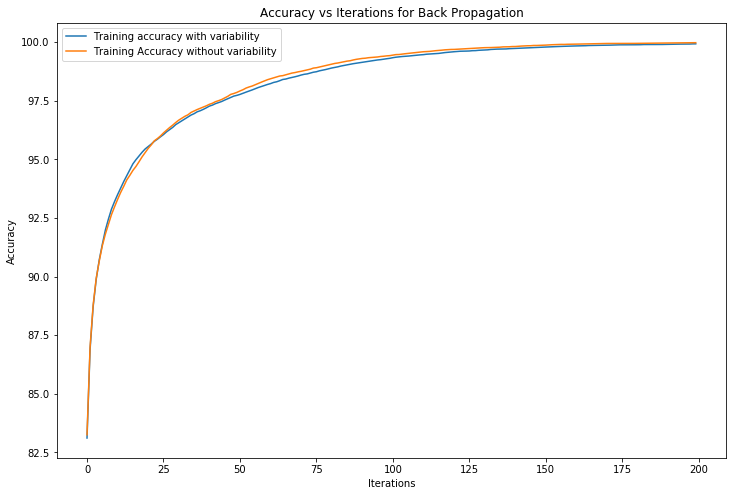

In [25]:
print_op=1
#iters = [print_op*i for i in range(1,(iter//print_op)+1)]
plt.figure(figsize = (12,8))
plt.plot(train_acc)
plt.plot(train_acc_n)
plt.legend(['Training accuracy with variability', 'Training Accuracy without variability'])
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
# plt.ylim(80,100)
plt.title("Accuracy vs Iterations for Back Propagation")

In [14]:
W1, b1, W2, b2, W3, b3, train_acc, val_acc, train_loss, val_loss, sum_weights=stocastic_batch_grad_descent(x_train,y_train,200, 0.05, 2000)

Params Initialised
Iteration: 1
Train accuracy: 14.217460317460318
Val accuracy: 14.257142857142856
Iteration: 2
Train accuracy: 32.766666666666666
Val accuracy: 32.042857142857144
Iteration: 3
Train accuracy: 21.14920634920635
Val accuracy: 21.857142857142858
Iteration: 4
Train accuracy: 47.37777777777778
Val accuracy: 47.385714285714286
Iteration: 5
Train accuracy: 48.769841269841265
Val accuracy: 48.98571428571429
Iteration: 6
Train accuracy: 53.614285714285714
Val accuracy: 53.87142857142857
Iteration: 7
Train accuracy: 64.26666666666667
Val accuracy: 64.25714285714285
Iteration: 8
Train accuracy: 69.14285714285714
Val accuracy: 69.69999999999999
Iteration: 9
Train accuracy: 71.3047619047619
Val accuracy: 71.78571428571429
Iteration: 10
Train accuracy: 72.38095238095238
Val accuracy: 72.8142857142857
Iteration: 11
Train accuracy: 73.62857142857143
Val accuracy: 73.94285714285715
Iteration: 12
Train accuracy: 74.26666666666667
Val accuracy: 74.62857142857143
Iteration: 13
Train accu

Text(0.5, 1.0, 'Accuracy vs Iterations for Back Propagation')

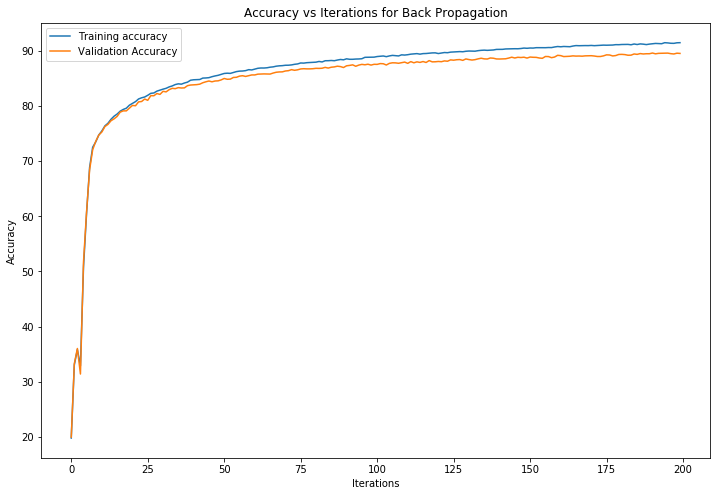

In [39]:
print_op=1
#iters = [print_op*i for i in range(1,(iter//print_op)+1)]
plt.figure(figsize = (12,8))
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['Training accuracy', 'Validation Accuracy'])
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
# plt.ylim(80,100)
plt.title("Accuracy vs Iterations for Back Propagation")

Text(0.5, 1.0, 'Accuracy vs Iterations for Back Propagation')

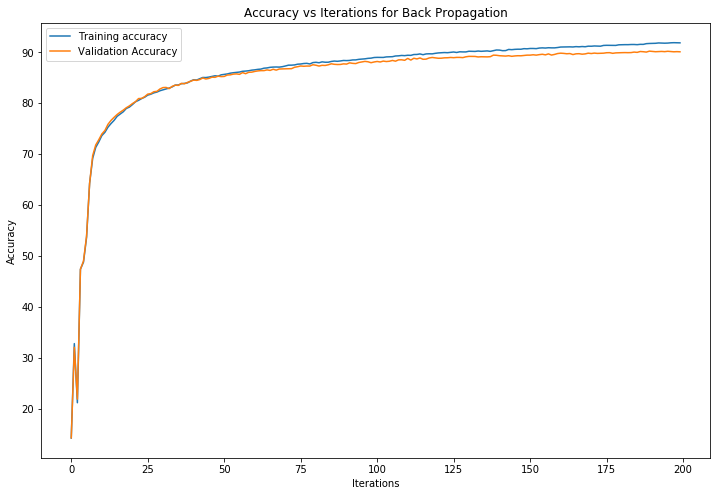

In [15]:
print_op=1
#iters = [print_op*i for i in range(1,(iter//print_op)+1)]
plt.figure(figsize = (12,8))
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['Training accuracy', 'Validation Accuracy'])
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
# plt.ylim(80,100)
plt.title("Accuracy vs Iterations for Back Propagation")

In [40]:
#have to change with different number of layers

W1, b1, W2, b2, W3, b3, train_acc, val_acc, train_loss, val_loss, sum_weights = grad_descent(x_train, y_train, iter = 400, lr =  0.01, print_op = 1)

Params Initialised
Iteration: 1
Train accuracy: 9.08095238095238
Val accuracy: 9.685714285714287
Iteration: 2
Train accuracy: 17.814285714285713
Val accuracy: 17.742857142857144
Iteration: 3
Train accuracy: 22.733333333333334
Val accuracy: 23.085714285714285
Iteration: 4
Train accuracy: 27.480952380952385
Val accuracy: 27.74285714285714
Iteration: 5


KeyboardInterrupt: 

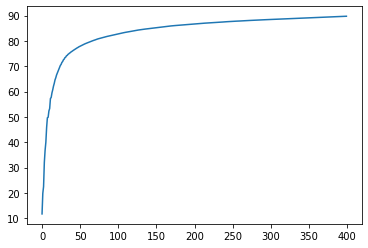

In [7]:
plt.plot(train_acc)

In [8]:
#have to change with different number of layers

W1, b1, W2, b2, W3, b3, train_acc, val_acc, train_loss, val_loss, sum_weights = grad_descent(x_train, y_train, iter = 200, lr =  0.05, print_op = 1)

Params Initialised
Iteration: 1
Train accuracy: 17.582539682539682
Val accuracy: 17.8
Iteration: 2
Train accuracy: 32.63174603174603
Val accuracy: 33.31428571428571
Iteration: 3
Train accuracy: 31.244444444444447
Val accuracy: 31.485714285714284
Iteration: 4
Train accuracy: 34.68571428571428
Val accuracy: 33.42857142857143
Iteration: 5
Train accuracy: 49.3
Val accuracy: 50.07142857142857
Iteration: 6
Train accuracy: 62.661904761904765
Val accuracy: 62.142857142857146
Iteration: 7
Train accuracy: 71.35714285714285
Val accuracy: 71.54285714285714
Iteration: 8
Train accuracy: 73.4015873015873
Val accuracy: 73.4
Iteration: 9
Train accuracy: 74.4888888888889
Val accuracy: 74.5
Iteration: 10
Train accuracy: 75.32222222222222
Val accuracy: 75.57142857142857
Iteration: 11
Train accuracy: 76.04920634920634
Val accuracy: 76.14285714285714
Iteration: 12
Train accuracy: 76.67936507936508
Val accuracy: 76.65714285714286
Iteration: 13
Train accuracy: 77.2968253968254
Val accuracy: 77.08571428571429


Text(0.5, 1.0, 'Accuracy vs Iterations for Back Propagation')

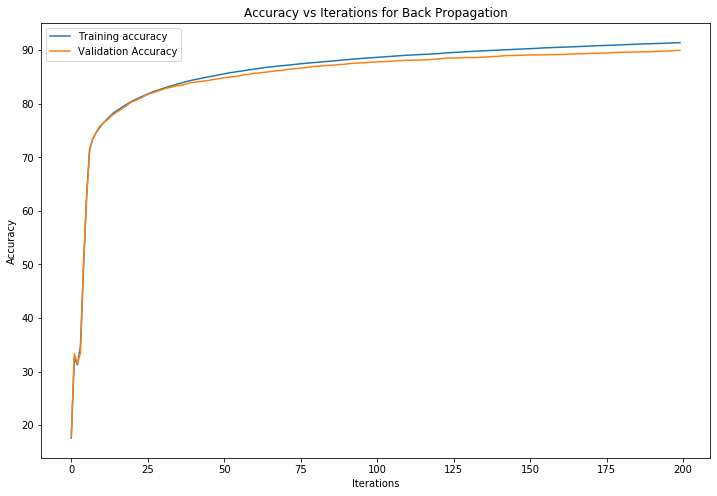

In [11]:
print_op=1
#iters = [print_op*i for i in range(1,(iter//print_op)+1)]
plt.figure(figsize = (12,8))
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['Training accuracy', 'Validation Accuracy'])
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
# plt.ylim(80,100)
plt.title("Accuracy vs Iterations for Back Propagation")

# Final MNIST CODE with variability

In [6]:
def Gaussian_init(mu, sigma):
  np.random.seed(2)

  gauss_w1 = np.random.normal(mu, sigma, (500, 784))
  gauss_b1 = np.random.normal(mu, sigma, (500, 1))
  gauss_w2 = np.random.normal(mu, sigma, (500, 500))
  gauss_b2 = np.random.normal(mu, sigma, (500, 1))
  gauss_w3 = np.random.normal(mu, sigma, (10,500))
  gauss_b3 = np.random.normal(mu, sigma, (10, 1))
  #gauss_w4 = np.random.normal(mu, sigma, (50, 200))
  #gauss_b4 = np.random.normal(mu, sigma, (50, 1))
  #gauss_w5 = np.random.normal(mu, sigma, (10, 50))
  #gauss_b5 = np.random.normal(mu, sigma, (10, 1)) 

  gauss_w1[gauss_w1 < 0.1] = 0.1
  gauss_b1[gauss_b1 < 0.1] = 0.1
  gauss_w2[gauss_w2 < 0.1] = 0.1
  gauss_b2[gauss_b2 < 0.1] = 0.1  
  gauss_w3[gauss_w3 < 0.1] = 0.1
  gauss_b3[gauss_b3 < 0.1] = 0.1 
  #gauss_w4[gauss_w4 < 0.1] = 0.1
  #gauss_b4[gauss_b4 < 0.1] = 0.1 
  #gauss_w5[gauss_w5 < 0.1] = 0.1
  #gauss_b5[gauss_b5 < 0.1] = 0.1 


  return (gauss_w1, gauss_b1, gauss_w2, gauss_b2, gauss_w3, gauss_b3)
  
#have to change with different number of layers
def params_init():

  #np.random.seed(2)
  W1 = np.random.rand(500,784) - 0.5
  b1 = np.random.rand(500,1) - 0.5
  W2 = np.random.rand(500,500) - 0.5
  b2 = np.random.rand(500,1) - 0.5
  W3 = np.random.rand(10,500) - 0.5 
  b3 = np.random.rand(10,1) - 0.5
  #W4 = np.random.rand(50,200) - 0.5   
  #b4 = np.random.rand(50,1) - 0.5    
  #W5 = np.random.rand(10,50) - 0.5  
  #b5 = np.random.rand(10,1) - 0.5    
  print("Params Initialised")

  return (W1, b1, W2, b2, W3, b3)


#have to change with different number of layers
def forward(x_train, W1, b1, W2, b2, W3, b3):
  #print("Entered FP")
  Z1 = np.matmul(W1,x_train) + b1 #W1 is 50*784, x_train is 748*m, Z1 is 50*m
  A1 = relu(Z1)

  Z2 = np.matmul(W2,A1) + b2 
  A2 = relu(Z2)

  Z3 = np.matmul(W3,A2) + b3
  A3 = softmax(Z3)
  
  #Z4 = np.matmul(W4,A3) + b4
  #A4 = relu(Z4)

  #Z5 = np.matmul(W5,A4) + b5
  #A5 = softmax(Z5)

  #W2 is 10*50, A1 is 50*m
  # print(np.exp(Z2))
  # print(np.sum(np.exp(Z2)))

  #A2 is 10*m, final predictions
  # print("Fp Done")

  return Z1, A1, Z2, A2, Z3, A3


def relu(x):
   return np.maximum(x,0)


def softmax(Z):
  return np.exp(Z) / np.sum(np.exp(Z),0)


def relu_d(x):
  return x>0


def one_hot_encoding(y):
  shape = (y.shape[0], 10)
  one_hot = np.zeros(shape)
  rows = np.arange(y.size)
  one_hot[rows, y] = 1
  return one_hot.T


#have to change with different number of layers
def backprop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, y):
  # print("Entered Backprop")
  m = y.shape[0] #m is the number of training examples
  Y = one_hot_encoding(y)

  dZ3 = (A3 - Y)
  
  dW3 = 1/m*np.matmul(dZ3,A2.T)

  db3 = 1/m*np.sum(dZ3, axis=1)

  dZ2 = np.matmul(W3.T, dZ3)*relu_d(Z2) #W2 is 10*50, dZ2 = 10*m, dZ1 = 50*m

  dW2 = 1/m*np.matmul(dZ2,A1.T) #shape of dZ1 is 50*m, X is 784*m, dW1 = 50*784

  db2 = 1/m*np.sum(dZ2, axis=1) #db1 is 50*1

  dZ1 = np.matmul(W2.T, dZ2)*relu_d(Z1) #W2 is 10*50, dZ2 = 10*m, dZ1 = 50*m

  dW1 = 1/m*np.matmul(dZ1,X.T) #shape of dZ1 is 50*m, X is 784*m, dW1 = 50*784

  db1 = 1/m*np.sum(dZ1, axis = 1) #db1 is 50*1


  return dW1, db1, dW2, db2, dW3, db3


#have to change with different number of layers
def param_update(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, lr, factor=0):

  #updates the parameters based on backpropogation and decay rate
  #decay = np.exp(factor)

  #W1 = W1*np.exp(-5*factor) - lr*dW1
  #b1 = b1*np.exp(-5*factor) - lr*db1
  #W2 = W2*np.exp(-4*factor) - lr*dW2
  #b2 = b2*np.exp(-4*factor) - lr*db2
  #W3 = W3*np.exp(-3*factor) - lr*dW3
  #b3 = b3*np.exp(-3*factor) - lr*db3
  #W4 = W4*np.exp(-2*factor) - lr*dW4
  #b4 = b4*np.exp(-2*factor) - lr*db4
  #W5 = W5*np.exp(-1*factor) - lr*dW5
  #b5 = b5*np.exp(-1*factor) - lr*db5

  W1 = W1 - lr*dW1
  b1 = b1 - lr*(db1.reshape(b1.shape))
  W2 = W2 - lr*dW2
  b2 = b2 - lr*(db2.reshape(b2.shape))
  W3 = W3 - lr*dW3
  b3 = b3 - lr*(db3.reshape(b3.shape))
  #W4 = W4 - lr*dW4
  #b4 = b4 - lr*db4

  return W1, b1, W2, b2, W3, b3


def param_update_with_variability(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, gW1, gb1, gW2, gb2, gW3, gb3, lr):

  #updates the parameters based on backpropogation and decay rate
  #decay = np.exp(factor) #calculate the decay factor
  
  #alpha = t/t_ret, alpha around 5e-4, t_ret around 10ms, thus t_forw aorund 5e-6
  t_forw = 5e-6
  decay_w1 = np.exp(-3*t_forw/gW1)
  decay_b1 = np.exp(-3*t_forw/gb1)
  decay_w2 = np.exp(-2*t_forw/gW2)
  decay_b2 = np.exp(-2*t_forw/gb2)
  decay_w3 = np.exp(-1*t_forw/gW3)
  decay_b3 = np.exp(-1*t_forw/gb3)

  W1 = W1*decay_w1 - lr*dW1
  b1 = b1*decay_b1 - lr*(db1.reshape(b1.shape))
  W2 = W2*decay_w2 - lr*dW2
  b2 = b2*decay_b2 - lr*(db2.reshape(b2.shape))
  W3 = W3*decay_w3 - lr*dW3
  b3 = b3*decay_b3 - lr*(db3.reshape(b3.shape))

  return W1, b1, W2, b2, W3, b3


#have to change with different number of layers
def batch_grad_descent(X,Y,iter, lr, print_op=1, decay_factor=0):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []
  train_loss = []
  val_loss = []
  W1Weight = []
  W2Weight = []
  W3Weight = []
  b1Weight = []
  b2Weight = []
  b3Weight = []

  mu = 1
  sigma = 0.4

  W1, b1, W2, b2, W3, b3 = params_init()
  #print(W1)
  #gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3, gaussian_W4, gaussian_b4, gaussian_W5, gaussian_b5 = Gaussian_init (mu, sigma)


  for i in range(iter): #loop over 
    train_loss_score = 0
    val_loss_score = 0
    for j in range(100): #loop over batches
      # print("Entered for loops in grad descent")
      #total training samples = 63000, batch size = 630
      X1, Y1 = shuffle(X[:, j*630: (j+1)*630].T,Y[j*630: (j+1)*630]) #shuffle each batch
      X1 = X1.T #take transpose to match the sizes

      W1Weight.append(W1)
      W2Weight.append(W2)
      W3Weight.append(W3)
      b1Weight.append(b1)
      b2Weight.append(b2)
      b3Weight.append(b3)

      Z1, A1, Z2, A2, Z3, A3 = forward(X1, W1, b1, W2, b2, W3, b3) 

      dW1, db1, dW2, db2, dW3, db3 = backprop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X1, Y1)

      W1, b1, W2, b2, W3, b3 = param_update(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, lr = lr, factor = decay_factor)

    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')

      #obtain training loss
      _, _, _, _, _, A3_train = forward(X, W1, b1, W2, b2, W3, b3)
      #for i in range(0, Y.shape[0]):
       # train_loss_score = train_loss_score + (-1*(np.log(A5_train[Y[i], i])))
      #train_loss.append(train_loss_score)
      #print(f'Train Loss: {train_loss_score}')

      #obtain training accuracy
      train_score = accuracy(predictions(A3_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')

      ##obtain validation loss
      _, _, _, _, _,  A3_val = forward(x_val, W1, b1, W2, b2, W3, b3)
      #for i in range(0, y_val.shape[0]):
       # val_loss_score = val_loss_score + (-1*(np.log(A5_val[y_val[i], i]))) 
      #val_loss.append(val_loss_score)
      #print(f'Validation Loss: {val_loss_score}')

      ##obtain validation accuracy
      val_score = accuracy(predictions(A3_val), y_val)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      #sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(W3)) + np.sum(abs(W4)) + np.sum(abs(W5)) + np.sum(abs(b1)) + np.sum(abs(b2)) + np.sum(abs(b3))  + np.sum(abs(b4)) + np.sum(abs(b5))
      #sum_weights.append(sum_w)
      #print(f'Sum of weights: {sum_w}')

  return W1Weight, b1Weight, W2Weight, b2Weight, W3Weight, b3Weight, train_acc, val_acc, train_loss, val_loss, sum_weights



def batch_grad_descentwith_var(X,Y,iter, lr, print_op=1, decay_factor=0):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []
  train_loss = []
  val_loss = []

  mu = 1
  sigma = 0.4

  W1, b1, W2, b2, W3, b3 = params_init()
  #print(W1)
  gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3 = Gaussian_init (mu, sigma)


  for i in range(iter): #loop over 
    train_loss_score = 0
    val_loss_score = 0
    for j in range(100): #loop over batches
      # print("Entered for loops in grad descent")
      #total training samples = 63000, batch size = 630
      X1, Y1 = shuffle(X[:, j*630: (j+1)*630].T,Y[j*630: (j+1)*630]) #shuffle each batch
      X1 = X1.T #take transpose to match the sizes

      Z1, A1, Z2, A2, Z3, A3 = forward(X1, W1, b1, W2, b2, W3, b3) 

      dW1, db1, dW2, db2, dW3, db3 = backprop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X1, Y1)

      W1, b1, W2, b2, W3, b3 = param_update(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3,lr)

    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')

      #obtain training loss
      _, _, _, _, _, A3_train = forward(X, W1, b1, W2, b2, W3, b3)
      #for i in range(0, Y.shape[0]):
       # train_loss_score = train_loss_score + (-1*(np.log(A5_train[Y[i], i])))
      #train_loss.append(train_loss_score)
      #print(f'Train Loss: {train_loss_score}')

      #obtain training accuracy
      train_score = accuracy(predictions(A3_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')

      ##obtain validation loss
      _, _, _, _, _,  A3_val = forward(x_val, W1, b1, W2, b2, W3, b3)
      #for i in range(0, y_val.shape[0]):
       # val_loss_score = val_loss_score + (-1*(np.log(A5_val[y_val[i], i]))) 
      #val_loss.append(val_loss_score)
      #print(f'Validation Loss: {val_loss_score}')

      ##obtain validation accuracy
      val_score = accuracy(predictions(A3_val), y_val)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      #sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(W3)) + np.sum(abs(W4)) + np.sum(abs(W5)) + np.sum(abs(b1)) + np.sum(abs(b2)) + np.sum(abs(b3))  + np.sum(abs(b4)) + np.sum(abs(b5))
      #sum_weights.append(sum_w)
      #print(f'Sum of weights: {sum_w}')

  return W1, b1, W2, b2, W3, b3, train_acc, val_acc, train_loss, val_loss, sum_weights





def stocastic_batch_grad_descent(X,Y,iter, lr, batchsize, print_op=1, decay_factor=0):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []
  train_loss = []
  val_loss = []

  mu = 1
  sigma = 0.4

  W1, b1, W2, b2, W3, b3 = params_init()
  #print(W1)
  gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3 = Gaussian_init (mu, sigma)


  for i in range(iter): #loop over 
    train_loss_score = 0
    val_loss_score = 0
    max_value_j = 63000//batchsize
    j = np.random.randint(0, max_value_j) #loop over batches
      # print("Entered for loops in grad descent")
      #total training samples = 63000, batch size = 630
    X1, Y1 = shuffle(X[:, j*batchsize: (j+1)*batchsize].T,Y[j*batchsize: (j+1)*batchsize]) #shuffle each batch
    X1 = X1.T #take transpose to match the sizes

    Z1, A1, Z2, A2, Z3, A3 = forward(X1, W1, b1, W2, b2, W3, b3) 

    dW1, db1, dW2, db2, dW3, db3 = backprop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X1, Y1)

    #W1, b1, W2, b2, W3, b3 = param_update(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, lr = lr, factor = decay_factor)

    W1, b1, W2, b2, W3, b3 = param_update_with_variability(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3,lr)

    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')

      #obtain training loss
      _, _, _, _, _, A3_train = forward(X, W1, b1, W2, b2, W3, b3)
      #for i in range(0, Y.shape[0]):
       # train_loss_score = train_loss_score + (-1*(np.log(A5_train[Y[i], i])))
      #train_loss.append(train_loss_score)
      #print(f'Train Loss: {train_loss_score}')

      #obtain training accuracy
      train_score = accuracy(predictions(A3_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')

      ##obtain validation loss
      _, _, _, _, _,  A3_val = forward(x_val, W1, b1, W2, b2, W3, b3)
      #for i in range(0, y_val.shape[0]):
       # val_loss_score = val_loss_score + (-1*(np.log(A5_val[y_val[i], i]))) 
      #val_loss.append(val_loss_score)
      #print(f'Validation Loss: {val_loss_score}')

      ##obtain validation accuracy
      val_score = accuracy(predictions(A3_val), y_val)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      #sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(W3)) + np.sum(abs(W4)) + np.sum(abs(W5)) + np.sum(abs(b1)) + np.sum(abs(b2)) + np.sum(abs(b3))  + np.sum(abs(b4)) + np.sum(abs(b5))
      #sum_weights.append(sum_w)
      #print(f'Sum of weights: {sum_w}')

  return W1, b1, W2, b2, W3, b3, train_acc, val_acc, train_loss, val_loss, sum_weights





def grad_descent(X,Y,iter, lr, print_op, decay_factor=0):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []
  train_loss = []
  val_loss = []

  mu = 1
  sigma = 0.4

  W1, b1, W2, b2, W3, b3 = params_init()
  #print(W1)
  #gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3, gaussian_W4, gaussian_b4, gaussian_W5, gaussian_b5 = Gaussian_init (mu, sigma)


  for i in range(iter): #loop over 
    train_loss_score = 0
    val_loss_score = 0
    X1, Y1 = X.T, Y
    X1 = X1.T #take transpose to match the sizes

    Z1, A1, Z2, A2, Z3, A3 = forward(X1, W1, b1, W2, b2, W3, b3) 

    dW1, db1, dW2, db2, dW3, db3 = backprop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X1, Y1)

    W1, b1, W2, b2, W3, b3 = param_update(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, lr = lr, factor = decay_factor)

    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')

      #obtain training loss
      _, _, _, _, _, A3_train = forward(X, W1, b1, W2, b2, W3, b3)
      #for i in range(0, Y.shape[0]):
       # train_loss_score = train_loss_score + (-1*(np.log(A5_train[Y[i], i])))
      #train_loss.append(train_loss_score)
      #print(f'Train Loss: {train_loss_score}')

      #obtain training accuracy
      train_score = accuracy(predictions(A3_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')

      ##obtain validation loss
      _, _, _, _, _,  A3_val = forward(x_val, W1, b1, W2, b2, W3, b3)
      #for i in range(0, y_val.shape[0]):
       # val_loss_score = val_loss_score + (-1*(np.log(A5_val[y_val[i], i]))) 
      #val_loss.append(val_loss_score)
      #print(f'Validation Loss: {val_loss_score}')

      ##obtain validation accuracy
      val_score = accuracy(predictions(A3_val), y_val)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      #sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(W3)) + np.sum(abs(W4)) + np.sum(abs(W5)) + np.sum(abs(b1)) + np.sum(abs(b2)) + np.sum(abs(b3))  + np.sum(abs(b4)) + np.sum(abs(b5))
      #sum_weights.append(sum_w)
      #print(f'Sum of weights: {sum_w}')

  return W1, b1, W2, b2, W3, b3, train_acc, val_acc, train_loss, val_loss, sum_weights


def predictions(A):
  #argmax returns the index of maximum value, we will feed the sigmoid output to this function 
  return np.argmax(A,0)


def accuracy(A,Y):
  #this will compare the predicted output to the ground truth
  return np.sum(A == Y)/Y.shape[0]*100


In [ ]:
W1, b1, W2, b2, W3, b3, train_acc, val_acc, train_loss, val_loss, sum_weights = batch_grad_descent(x_train,y_train,100, 0.01)

# Node perturbation

In [ ]:
#have to change with different number of layers
def params_init():

  #np.random.seed(2)
  W1 = np.random.rand(500,784) - 0.5
  b1 = np.random.rand(500,1) - 0.5
  W2 = np.random.rand(500,500) - 0.5
  b2 = np.random.rand(500,1) - 0.5
  W3 = np.random.rand(10,500) - 0.5 
  b3 = np.random.rand(10,1) - 0.5
  #W4 = np.random.rand(50,200) - 0.5   
  #b4 = np.random.rand(50,1) - 0.5    
  #W5 = np.random.rand(10,50) - 0.5  
  #b5 = np.random.rand(10,1) - 0.5    
  print("Params Initialised")

  return (W1, b1, W2, b2, W3, b3)


#have to change with different number of layers
def forward(x_train, W1, b1, W2, b2, W3, b3):
  #print("Entered FP")
  Z1 = np.matmul(W1,x_train) + b1 #W1 is 50*784, x_train is 748*m, Z1 is 50*m
  A1 = relu(Z1)

  Z2 = np.matmul(W2,A1) + b2 
  A2 = relu(Z2)

  Z3 = np.matmul(W3,A2) + b3
  A3 = softmax(Z3)

  return Z1, A1, Z2, A2, Z3, A3

def predictions(A):
  #argmax returns the index of maximum value, we will feed the sigmoid output to this function 
  return np.argmax(A,0)


def accuracy(A,Y):
  #this will compare the predicted output to the ground truth
  return np.sum(A == Y)/Y.shape[0]*100


def one_hot_encoding(y):
  shape = (y.shape[0], 10)
  one_hot = np.zeros(shape)
  rows = np.arange(y.size)
  one_hot[rows, y] = 1
  return one_hot.T

def mse_loss(Y, predictions):
  return np.sum((Y-predictions)**2)

def forward_pass_for_Z1(pert, Z1):
  _, features = Z1.shape()
  for i in range(features):
    Z1_copy = Z1.copy()
    Z1_copy[i, :] += pert
    Z1_perturbed = Z1_copy


def node_perturbation(X, y, Z1, A1, Z2, A2, Z3, A3, W1, b1, W2, b2, W3, b3):
  m = y.shape[0] #m is the number of training examples
  Y = one_hot_encoding(y)
  Z1_copy = Z1.copy()
  Z2_copy = Z2.copy()
  Z3_copy = Z3.copy()


In [15]:
if not None:
    print("True")

True
